Adapted from:
- [https://maker.pro/raspberry-pi/tutorial/grid-detection-with-opencv-on-raspberry-pi](https://maker.pro/raspberry-pi/tutorial/grid-detection-with-opencv-on-raspberry-pi)
- [https://stackoverflow.com/questions/48954246/find-sudoku-grid-using-opencv-and-python](https://stackoverflow.com/questions/48954246/find-sudoku-grid-using-opencv-and-python)
- [https://docs.opencv.org/3.0-beta/doc/py_tutorials/py_imgproc/py_houghlines/py_houghlines.html](https://docs.opencv.org/3.0-beta/doc/py_tutorials/py_imgproc/py_houghlines/py_houghlines.html)
- [https://aishack.in/tutorials/sudoku-grabber-opencv-plot/](https://aishack.in/tutorials/sudoku-grabber-opencv-plot/)


In [30]:
# Notebooks can't display cv2 images natively, so we use this function to display them inline instead of cv2.imshow()

import io
from IPython.display import clear_output, Image, display
import PIL.Image

def showarray(a, fmt='jpeg'):
    a = np.uint8(np.clip(a, 0, 255))
    f = io.BytesIO()
    PIL.Image.fromarray(a).save(f, fmt)
    display(Image(data=f.getvalue()))

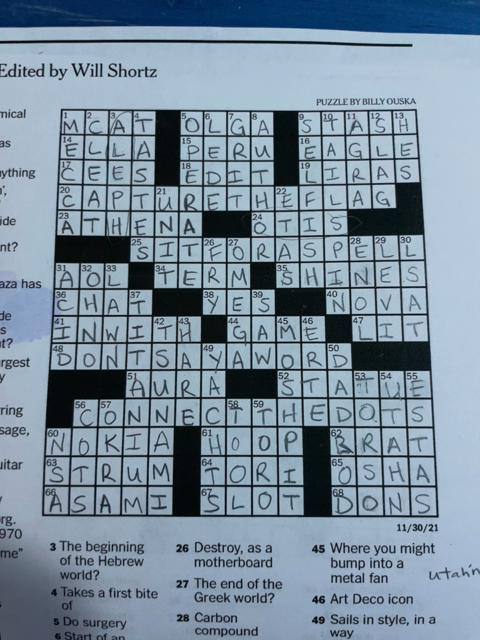

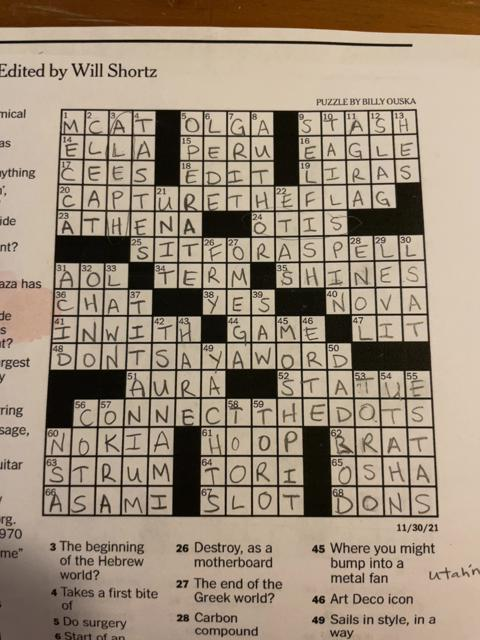

In [96]:
import cv2
import numpy as np

image = cv2.imread("../data/raw/1e30b83c-9dcc-4bba-87e2-cfc1c8218cf9.png")

# cv2 color channels are ordered BGR instead of RGB by default. rearrange color channels if you want a normal looking image
rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

showarray(image)
showarray(rgb)



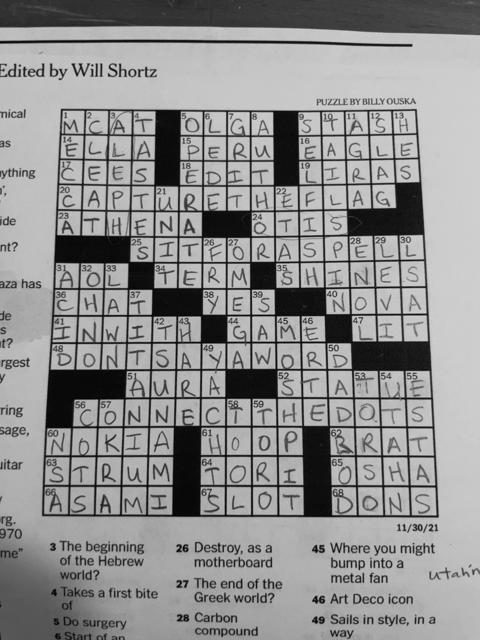

In [33]:
gray = cv2.cvtColor(rgb, cv2.COLOR_RGB2GRAY)
showarray(gray)

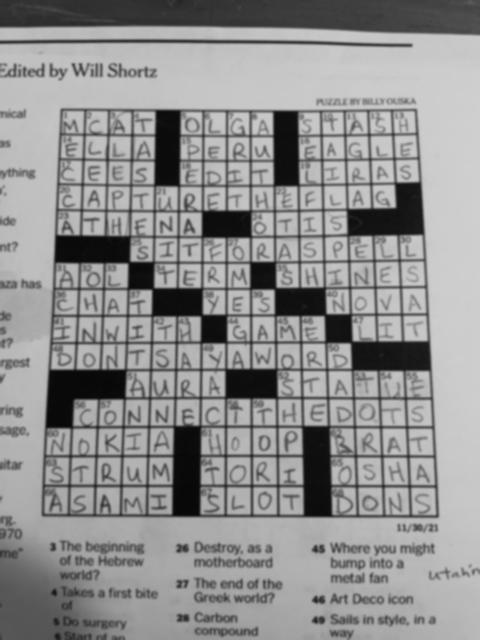

In [35]:
# blur the image to reduce noise
blur = cv2.GaussianBlur(gray, (5,5),0)
showarray(blur)

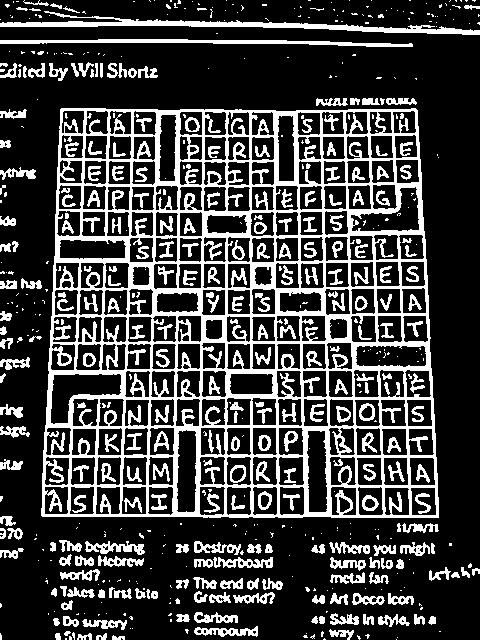

In [36]:
# apply thresholding to make everything black or white.  Adaptive thresholding is used to compensate for different lighting conditions across the image
thresh = cv2.adaptiveThreshold(blur,255,1,1,11,2)
showarray(thresh)

In [40]:
# find countours, the curves that joins all continuous points having the same color or intentsity
contours, _ = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)


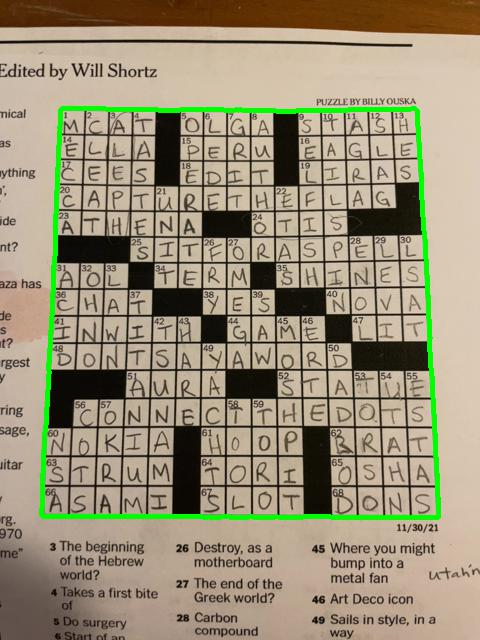

In [45]:
# we find the largest contour by area and assume this is the entire crossword grid
max_area = 0
c = 0
for i in contours:
        area = cv2.contourArea(i)
        if area > 1000:
                if area > max_area:
                    max_area = area
                    best_cnt = i
                    rgb_c = cv2.drawContours(rgb, contours, c, (0, 255, 0), 3)
        c+=1

showarray(rgb_c)

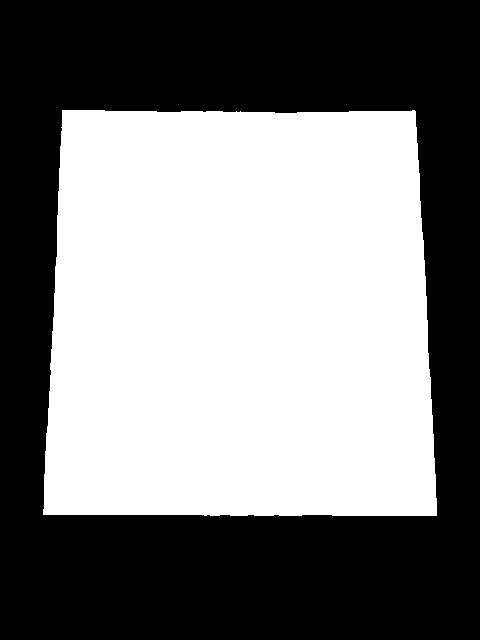

In [46]:
# draw a mask around our area of interest

mask = np.zeros((gray.shape),np.uint8)
cv2.drawContours(mask,[best_cnt],0,255,-1)
cv2.drawContours(mask,[best_cnt],0,0,2)
showarray(mask)

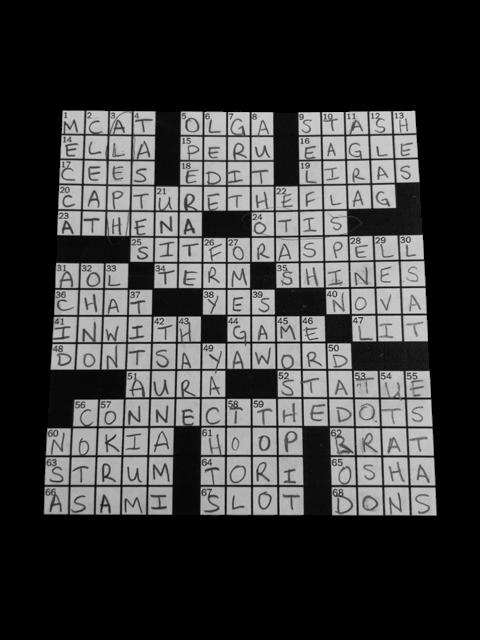

In [71]:
# apply the mask to crop the original image
out = np.zeros_like(gray)
out[mask == 255] = gray[mask == 255]
showarray(out)

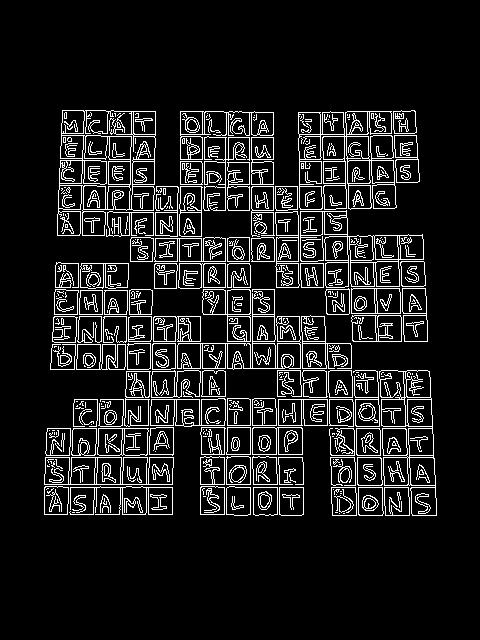

In [86]:
# find Canny edges
edges = cv2.Canny(out, 50, 200)
showarray(edges)

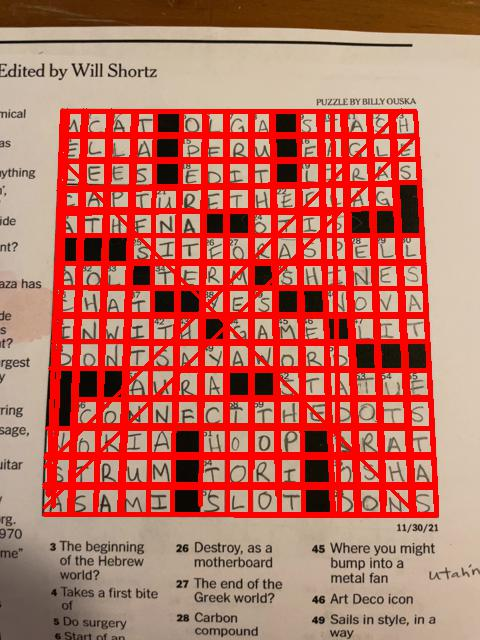

In [99]:
lines = cv2.HoughLinesP(edges, 1, np.pi/180, 130, None, 100, 250)
lined = rgb.copy()

for line in lines:
    x1, y1, x2, y2 = line[0]
    cv2.line(lined, (x1, y1), (x2, y2), (255, 0, 0), 3)

showarray(lined)